In [1]:
# !pip install --upgrade pandas
# !pip install --upgrade numpy
# !pip install --upgrade matplotlib
# !pip install --upgrade seaborn
# !pip install --upgrade scikit-learn
# !pip install --upgrade inflect

In [2]:
import nltk
import string
import re

## Part of Speech Tagging:
**The part of speech explains how a word is used in a sentence. In a sentence, a word can have different contexts and semantic meanings. The basic natural language processing models like bag-of-words fail to identify these relations between words. Hence, we use part of speech tagging to mark a word to its part of speech tag based on its context in the data. It is also used to extract relationships between words.**



In [3]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag

In [4]:
# convert text into word_tokens with their tags
def word_tagging(text):
  word_tokens = word_tokenize(text= text)
  return pos_tag(tokens= word_tokens)


text = 'You just gave me a scare'
print(word_tagging(text))

[('You', 'PRP'), ('just', 'RB'), ('gave', 'VBD'), ('me', 'PRP'), ('a', 'DT'), ('scare', 'NN')]


**In the given example, PRP stands for personal pronoun, RB for adverb, VBD for verb past tense, DT for determiner and NN for noun. We can get the details of all the part of speech tags using the Penn Treebank tagset.**

In [5]:
# extract information about the tag
# we can see all tagset using by formula
nltk.help.upenn_tagset('NN')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


## Chunking:
***Chunking is the process of extracting phrases from unstructured text and more structure to it. It is also known as shallow parsing. It is done on top of Part of Speech tagging. It groups word into “chunks”, mainly of noun phrases. Chunking is done using regular expressions.***

In [6]:
# define chunking function with text and regular
# expression representing grammar as parameter

def chunking(text, grammar):
    word_tokens = word_tokenize(text)
  
    # label words with part of speech
    word_pos = pos_tag(word_tokens)
  
    # create a chunk parser using grammar
    chunkParser = nltk.RegexpParser(grammar)
  
    # test it on the list of word tokens with tagged pos
    tree = chunkParser.parse(word_pos)
      
    for subtree in tree.subtrees():
        print(subtree)
    #tree.draw()


sentence = 'the little yellow bird is flying in the sky'
grammar = "NP: {<DT>?<JJ>*<NN>}"
chunking(sentence, grammar)
  


(S
  (NP the/DT little/JJ yellow/JJ bird/NN)
  is/VBZ
  flying/VBG
  in/IN
  (NP the/DT sky/NN))
(NP the/DT little/JJ yellow/JJ bird/NN)
(NP the/DT sky/NN)


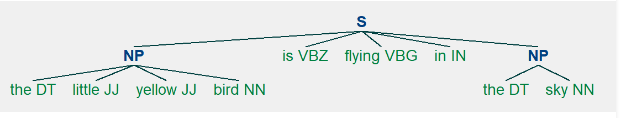


**In the given example, grammar, which is defined using a simple regular expression rule. This rule says that an NP (Noun Phrase) chunk should be formed whenever the chunker finds an optional determiner (DT) followed by any number of adjectives (JJ) and then a noun (NN).**

## Named Entity Recognition:
**Named Entity Recognition is used to extract information from unstructured text. It is used to classify entities present in a text into categories like a person, organization, event, places, etc. It gives us detailed knowledge about the text and the relationships between the different entities.**

In [7]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk

In [8]:
def named_entity_recognition(text):
    word_tokens = word_tokenize(text)

    word_pos = pos_tag(word_tokens)

    print(ne_chunk(word_pos))


text = 'Bill works for GeeksforGeeks so he went to Delhi for a meetup.'
named_entity_recognition(text)

(S
  (PERSON Bill/NNP)
  works/VBZ
  for/IN
  (ORGANIZATION GeeksforGeeks/NNP)
  so/RB
  he/PRP
  went/VBD
  to/TO
  (GPE Delhi/NNP)
  for/IN
  a/DT
  meetup/NN
  ./.)
